<a href="https://colab.research.google.com/github/harimshin/data-science-portfolio/blob/main/MLOps_Monitoring_Plan_Design_for_Gradient_Boosting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLOps - Monitoring Plan Design for Gradient Boosting Model**

In [ ]:
%%bash
pip install scikit-learn scipy copulas&> /dev/null

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Data preparation**

In [ ]:
colname = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'dep']
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', names=colname)

In [ ]:
print(df.head())

   var1  var2  var3  var4  var5  var6   var7  var8  dep
0     6   148    72    35     0  33.6  0.627    50    1
1     1    85    66    29     0  26.6  0.351    31    0
2     8   183    64     0     0  23.3  0.672    32    1
3     1    89    66    23    94  28.1  0.167    21    0
4     0   137    40    35   168  43.1  2.288    33    1


In [ ]:
df.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,dep
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Select features and target variable
X = df.drop(['dep'], axis = 1)
y = df['dep']
print(X.shape, y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(768, 8) (768,)


**Gradient Boosting without Hyperparameter Tuning**

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")

Accuracy: 0.7402597402597403


**Gradient Boosting with Hyperparameter Tuning (GridSearchCV)**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the results
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Model Accuracy: 0.7662337662337663


# **Monitoring Plan Design**

**1. Conceptual Soundness**



1-1. Model design (Gradient Boosting Specific)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


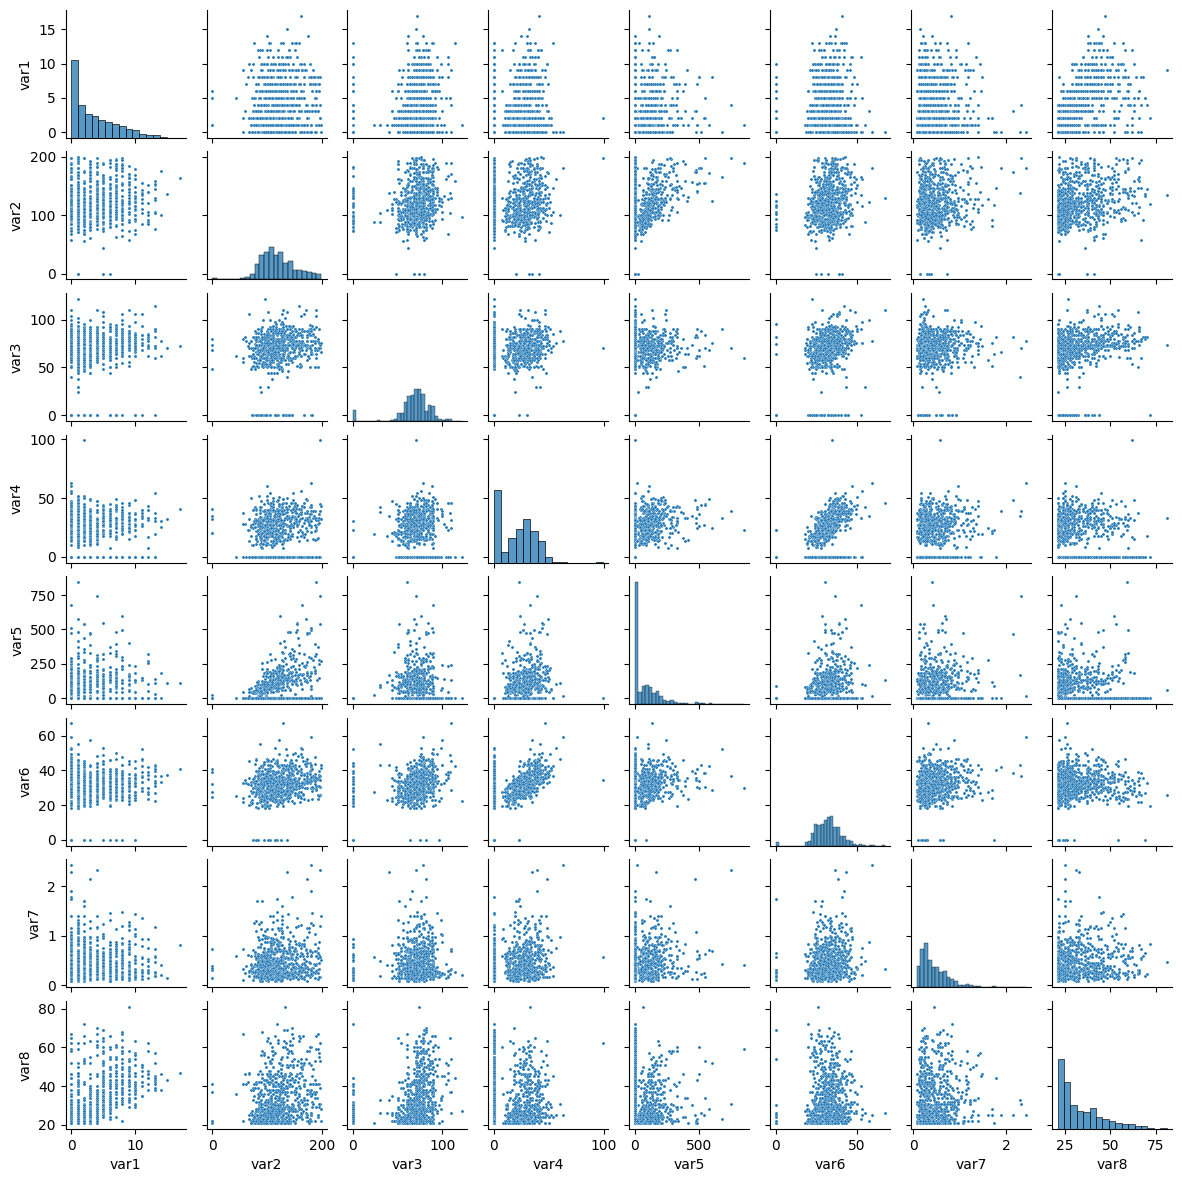

In [ ]:
# Non-linearity in features - pair plot
import seaborn as sns
X_pairplot = sns.pairplot(X, plot_kws={"s": 5}, size = 1.5)
X_pairplot

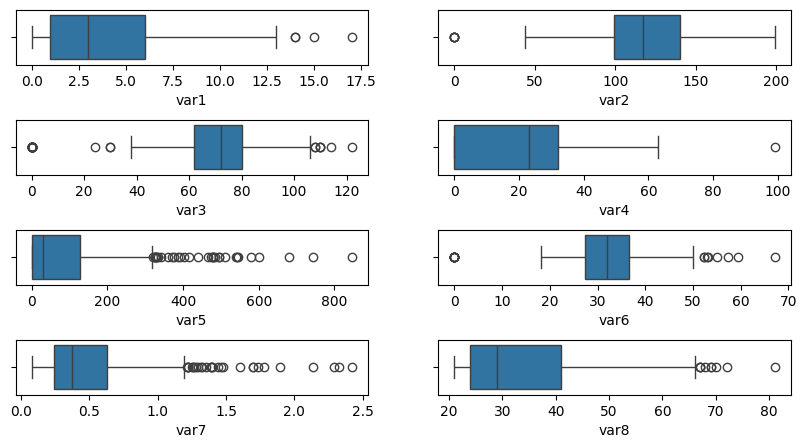

In [ ]:
# Outliers in features - box plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, figsize=(10, 5))
axes = axes.flatten()
for i in range(len(X.columns)):
  sns.boxplot(data=df, x="var"+str(i+1), ax = axes[i])
plt.subplots_adjust(hspace=1)
plt.show()

**2. Model Implementation & Deployment**

In [ ]:
# generate df_new, an arbitrary data set based on the distribution of the original data set using copula
# this is not the correct way to use copula for data with continuous and discrete variablee.
# the data generated here will be only used to demonstrate the code for data/concept drift and scalability testing

In [ ]:
pip install copulas

In [ ]:
from scipy.stats import norm
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d

copula_model = GaussianMultivariate()
copula_model.fit(df)

# generate df_new, a synthetic data of df
df_new = copula_model.sample(len(df))
df_new = pd.DataFrame(df_new, columns=df.columns)

# convert the dep to dummy variable
threshold = np.percentile(df_new['dep'],np.mean(df['dep'])*100)
df_new['dep'] = df_new['dep'].apply(lambda x: 1 if x > threshold else 0)

# extract features for data drift part
X_new = df_new.drop(['dep'], axis = 1)
y_new = df_new['dep']

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

2-1. Data Drift

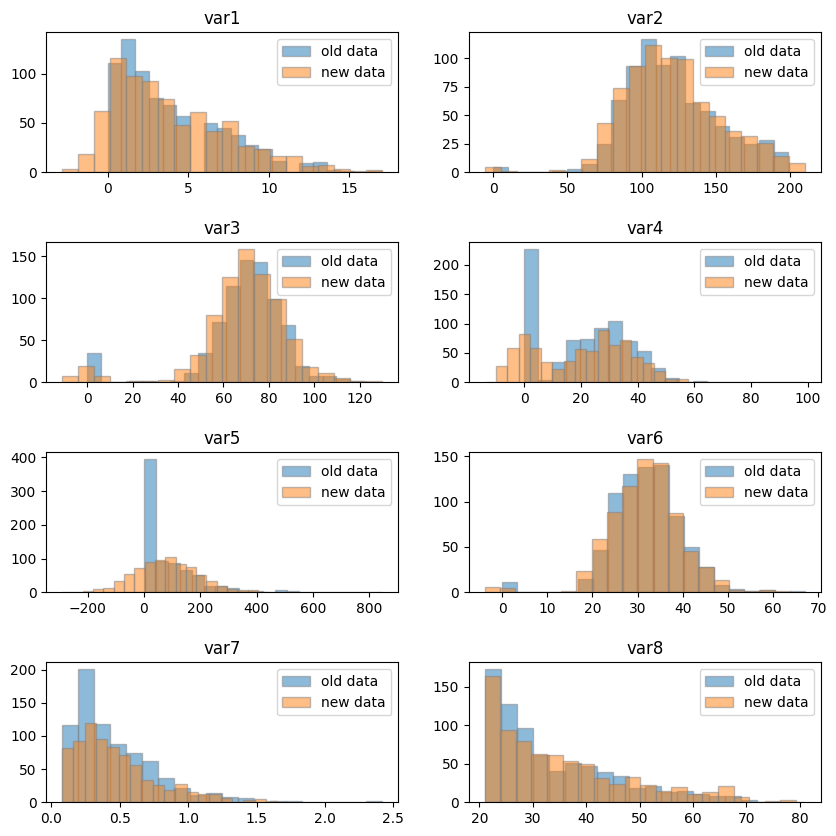

In [ ]:
## histogram comparison
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.5)
for i in range(len(X.columns)):
  plt.subplot(4,2,i+1)
  plt.hist(df['var' + str(i+1)], bins = 20, alpha = 0.5, edgecolor = 'grey', linewidth = 1, label = 'old data')
  plt.hist(df_new['var' + str(i+1)], bins = 20, alpha = 0.5, edgecolor = 'grey', linewidth = 1, label = 'new data')
  plt.legend(loc='upper right')
  plt.title('var' + str(i+1))

In [ ]:
## Kolmogorov-Smirnov (K-S) test

# calculate the p-value of each features
from scipy.stats import ks_2samp
X_drift_pvalue = ks_2samp(X, X_new).pvalue

# return the features showing data drift by p-value
for i in range(len(X.columns)):
  if X_drift_pvalue[i] < 0.05:
    print("A data drift exists in var" + str(i+1))

A data drift exists in var1
A data drift exists in var3
A data drift exists in var4
A data drift exists in var5
A data drift exists in var7
A data drift exists in var8


In [ ]:
## Population Stability Index (PSI)
# source: https://github.com/mwburke/population-stability-index

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):

    def psi(expected_array, actual_array, buckets):

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])

        expected_fractions = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_fractions = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = sum(sub_psi(expected_fractions[i], actual_fractions[i]) for i in range(0, len(expected_fractions)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[1 - axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

# calculate the psi for each features
for i in range(len(X.columns)):
  psi = calculate_psi(expected = df['var' + str(i+1)], actual = df_new['var' + str(i+1)])
  if psi < 0.1:
    print("no significant poulation change in var" + str(i+1))
  elif psi < 0.2:
    print("moderate poulation change in var" + str(i+1))
  else:
    print("significant population change in var" + str(i+1))

moderate poulation change in var1
no significant poulation change in var2
no significant poulation change in var3
no significant poulation change in var4
significant population change in var5
no significant poulation change in var6
no significant poulation change in var7
no significant poulation change in var8


In [ ]:
## Wasserstein Distance (= Earth mover's distance, optimal transport distance)
from scipy.stats import wasserstein_distance
for i in range(len(X.columns)):
  wd = wasserstein_distance(u_values = df['var' + str(i+1)], v_values = df_new['var' + str(i+1)])
  print("Wasserstein Distance for var" + str(i+1) + ": " + str(wd))

Wasserstein Distance for var1: 0.33509847399649517
Wasserstein Distance for var2: 1.214075414618649
Wasserstein Distance for var3: 1.7021976685858924
Wasserstein Distance for var4: 1.7159751837413066
Wasserstein Distance for var5: 43.03562220072463
Wasserstein Distance for var6: 0.38675840293365943
Wasserstein Distance for var7: 0.025408401818652372
Wasserstein Distance for var8: 2.1925950104989194


2-2. Performance test

In [ ]:
## Resource utilization - CPU, RAM
from psutil import cpu_percent, virtual_memory

cpu_usage = cpu_percent(interval=1)
memory_usage = virtual_memory().percent
print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage}%")

CPU Usage: 7.5%
Memory Usage: 18.7%


In [ ]:
## Scalability test

import time

# gradually increase the data size and measure the time taken
data_sizes = [1000, 5000, 10000, 50000]

for i in range(4):
  df_add = copula_model.sample(data_sizes[i])
  df_add = pd.DataFrame(df_add, columns=df.columns)
  threshold = np.percentile(df_add['dep'],np.mean(df['dep'])*100)
  df_add['dep'] = df_add['dep'].apply(lambda x: 1 if x > threshold else 0)

  start_time = time.time()

  X_add = df_add.drop(['dep'], axis=1)
  y_add = df_add['dep']
  X_add_train, X_add_test, y_add_train, y_add_test = train_test_split(X_add, y_add, test_size=0.2, random_state=42)
  grid_search.fit(X_add_train, y_add_train)
  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_
  y_add_pred_best = best_model.predict(X_add_test)

  end_time = time.time()

  execution_time = end_time - start_time

  print(f"Data size: {data_sizes[i]}, Time taken: {execution_time:.2f} seconds")

Data size: 1000, Time taken: 79.41 seconds
Data size: 5000, Time taken: 299.60 seconds
Data size: 10000, Time taken: 586.17 seconds
Data size: 50000, Time taken: 3399.23 seconds
